In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/Akhund-and-Human'

Mounted at /content/drive


In [7]:
train_datagenerator = ImageDataGenerator(
    rescale=1./255,
    zoom_range=.05,
    horizontal_flip=True,
    validation_split=0.1)

train_generator = train_datagenerator.flow_from_directory(
    data_dir,
    class_mode = 'categorical',
    target_size=(224, 224),
    batch_size=32,
    subset = 'training')

validation_generator = train_datagenerator.flow_from_directory(
    data_dir,
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=32,
    subset='validation')

Found 421 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


In [8]:
labels = ["akhund", "human"]

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(len(labels), activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
callbacks = [EarlyStopping(patience=5, restore_best_weights=True),
            ReduceLROnPlateau(patience=3, factor=0.5)]

In [10]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=35, callbacks=callbacks)

Epoch 1/35
14/14 ━━━━━━━━━━━━━━━━━━━━ 276s 19s/step - accuracy: 0.5765 - loss: 0.7854 - val_accuracy: 0.7556 - val_loss: 0.4603 - learning_rate: 0.0010
Epoch 2/35
14/14 ━━━━━━━━━━━━━━━━━━━━ 59s 634ms/step - accuracy: 0.8257 - loss: 0.4088 - val_accuracy: 0.8667 - val_loss: 0.3508 - learning_rate: 0.0010
Epoch 3/35
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 594ms/step - accuracy: 0.8847 - loss: 0.2888 - val_accuracy: 0.8889 - val_loss: 0.2941 - learning_rate: 0.0010
Epoch 4/35
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 548ms/step - accuracy: 0.9147 - loss: 0.2341 - val_accuracy: 0.8444 - val_loss: 0.2695 - learning_rate: 0.0010
Epoch 5/35
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 657ms/step - accuracy: 0.9275 - loss: 0.1930 - val_accuracy: 0.8222 - val_loss: 0.3460 - learning_rate: 0.0010
Epoch 6/35
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 628ms/step - accuracy: 0.9195 - loss: 0.2119 - val_accuracy: 0.8667 - val_loss: 0.2421 - learning_rate: 0.0010
Epoch 7/35
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 674ms/step - accuracy: 0.9319 - loss: 0.178

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step


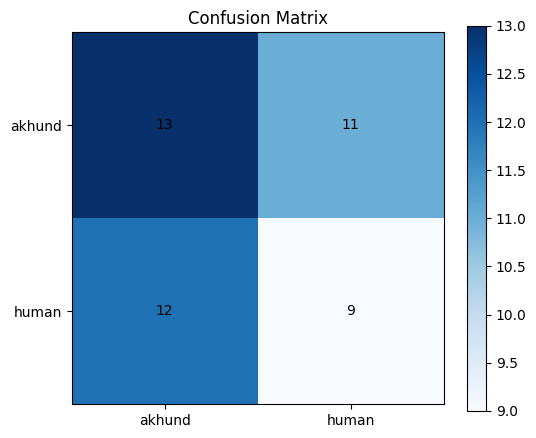

In [13]:
y_pred = np.argmax(model.predict(validation_generator), axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)

plt.figure(figsize=(6,5))
plt.imshow(cm, cmap="Blues")
plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)
plt.title("Confusion Matrix")
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j], ha="center", va="center", color="black")
plt.colorbar()
plt.show()